- Chosen SNR: 20dB
- Why: good balance: noise visible but not crazy

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# Signal parameters
# -----------------------
f0 = 50          # Hz
Fs = 1000        # samples/sec
T  = 1.0         # sec
Vm = 1.0         # peak amplitude

# -----------------------
# Noise control
# -----------------------
SNR_dB = 20      # try 10, 20, 30 later
rng = np.random.default_rng(0)  # fixed seed for reproducibility

# Plot window
show_T = 0.1


In [4]:
N = int(Fs * T)
t = np.arange(N) / Fs
v = Vm * np.sin(2 * np.pi * f0 * t)

show_N = int(Fs * show_T)


In [5]:
# Signal power (average)
Ps = np.mean(v**2)

# Noise power from target SNR
Pn = Ps / (10**(SNR_dB / 10))

# Noise standard deviation
sigma = np.sqrt(Pn)

# Generate Gaussian noise (mean 0, std sigma)
w = rng.normal(loc=0.0, scale=sigma, size=v.shape)

# Noisy signal
v_noisy = v + w


In [6]:
mean_w = np.mean(w)
std_w  = np.std(w)

Ps_hat = np.mean(v**2)
Pn_hat = np.mean(w**2)
SNR_hat_dB = 10 * np.log10(Ps_hat / Pn_hat)

print(f"Target SNR (dB):   {SNR_dB}")
print(f"Achieved SNR (dB): {SNR_hat_dB:.2f}")
print(f"mean(w):           {mean_w:.5f}")
print(f"std(w):            {std_w:.5f}  (target sigma = {sigma:.5f})")


Target SNR (dB):   20
Achieved SNR (dB): 20.19
mean(w):           -0.00340
std(w):            0.06907  (target sigma = 0.07071)


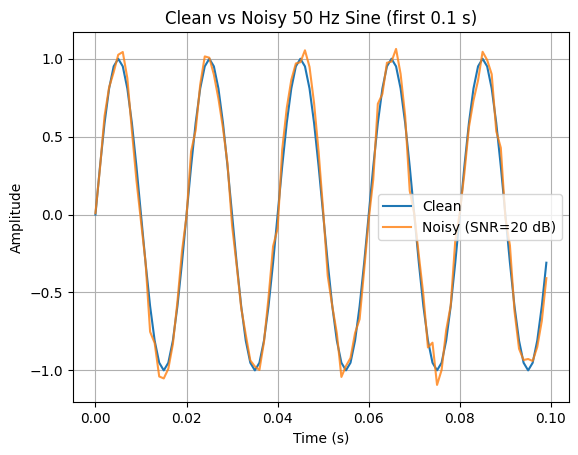

In [8]:
Path("results/figures").mkdir(parents=True, exist_ok=True)

plt.figure()
plt.plot(t[:show_N], v[:show_N], label="Clean")
plt.plot(t[:show_N], v_noisy[:show_N], label=f"Noisy (SNR={SNR_dB} dB)", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Clean vs Noisy 50 Hz Sine (first 0.1 s)")
plt.grid(True)
plt.legend()

plt.savefig("../results/figures/taskB_noisy_sine.png", dpi=200, bbox_inches="tight")
plt.show()
